In [ ]:
## Notebook for exploratory data analysis

import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('fear_greed_btc_combined.csv', index_col='timestamp', parse_dates=True)


In [152]:
# Calculate daily differences in the 'value' column
df['value_diff'] = df['value'].diff()

# Calculate the absolute value of these differences
df['value_diff_abs'] = df['value_diff'].abs()

# Calculate the average magnitude of change
average_magnitude_change = df['value_diff_abs'].mean()

print(f"The average daily movement in the 'value' column is: {average_magnitude_change:.2f}")

The average daily movement in the 'value' column is: 4.12


            value value_classification         Close  Log_Close  month  \
timestamp                                                                
2018-02-01     30                 Fear   9170.540039   9.123751      2   
2018-02-02     15         Extreme Fear   8830.750000   9.085995      2   
2018-02-03     40                 Fear   9174.910156   9.124228      2   
2018-02-04     24         Extreme Fear   8277.009766   9.021237      2   
2018-02-05     11         Extreme Fear   6955.270020   8.847255      2   
...           ...                  ...           ...        ...    ...   
2024-06-27     40                 Fear  61604.800781  11.028495      6   
2024-06-28     47              Neutral  60320.136719  11.007421      6   
2024-06-29     30                 Fear  60887.378906  11.016781      6   
2024-06-30     47              Neutral  62678.292969  11.045770      6   
2024-07-01     53              Neutral  62851.980469  11.048538      7   

            quarter  value_diff  valu

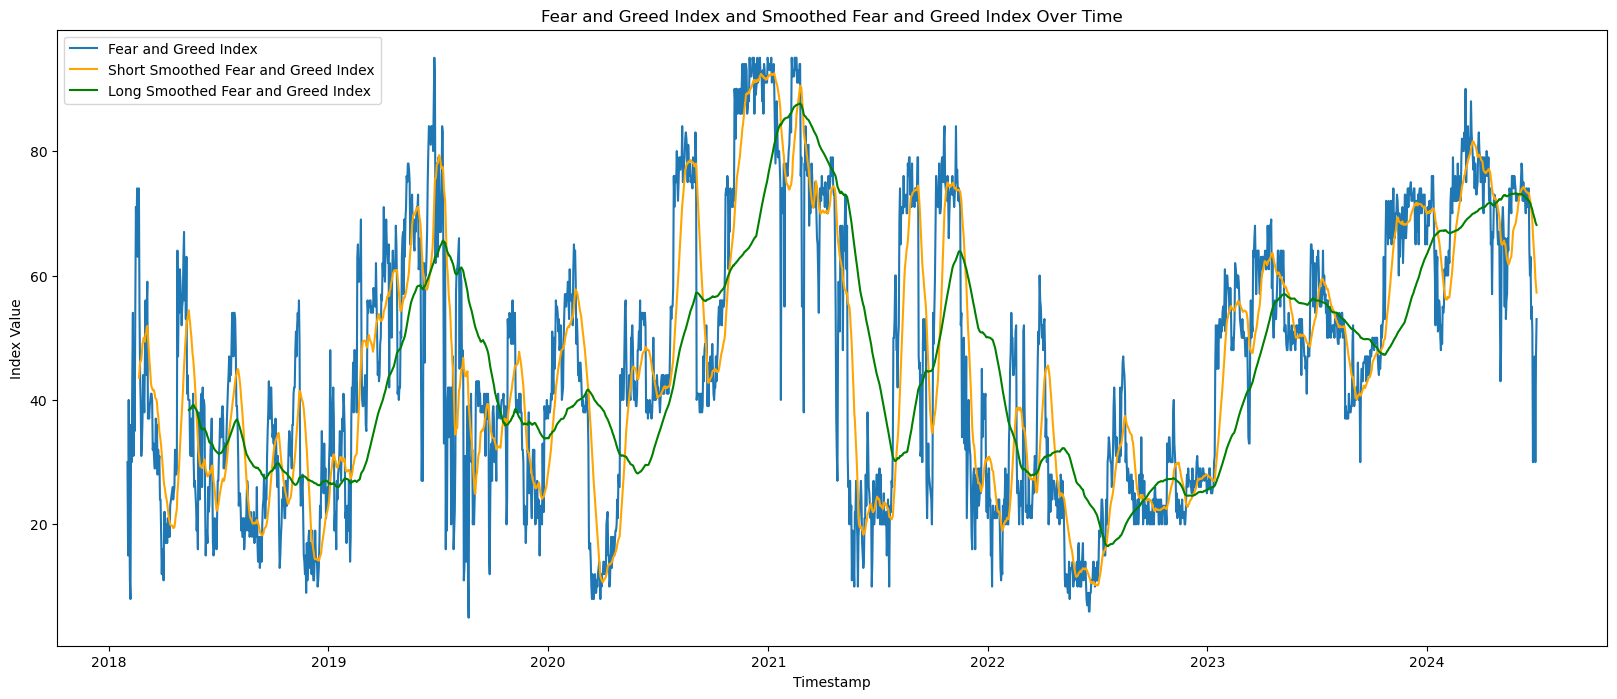

In [166]:
import matplotlib.pyplot as plt

# Calculate the rolling mean (smoothed average) with a window size of your choice (e.g., 3 days)
short_size = 20
df['short_smoothed_value'] = df['value'].rolling(window=short_size).mean()

long_size = 100
df['long_smoothed_value'] = df['value'].rolling(window=long_size).mean()

print(df)

# Plot the value and smoothed_value over time
plt.figure(figsize=(20, 8))
plt.plot(df.index, df['value'], label='Fear and Greed Index')
plt.plot(df.index, df['short_smoothed_value'], label='Short Smoothed Fear and Greed Index', color='orange')
plt.plot(df.index, df['long_smoothed_value'], label='Long Smoothed Fear and Greed Index', color='green')
plt.title('Fear and Greed Index and Smoothed Fear and Greed Index Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Index Value')
plt.legend()
plt.show()

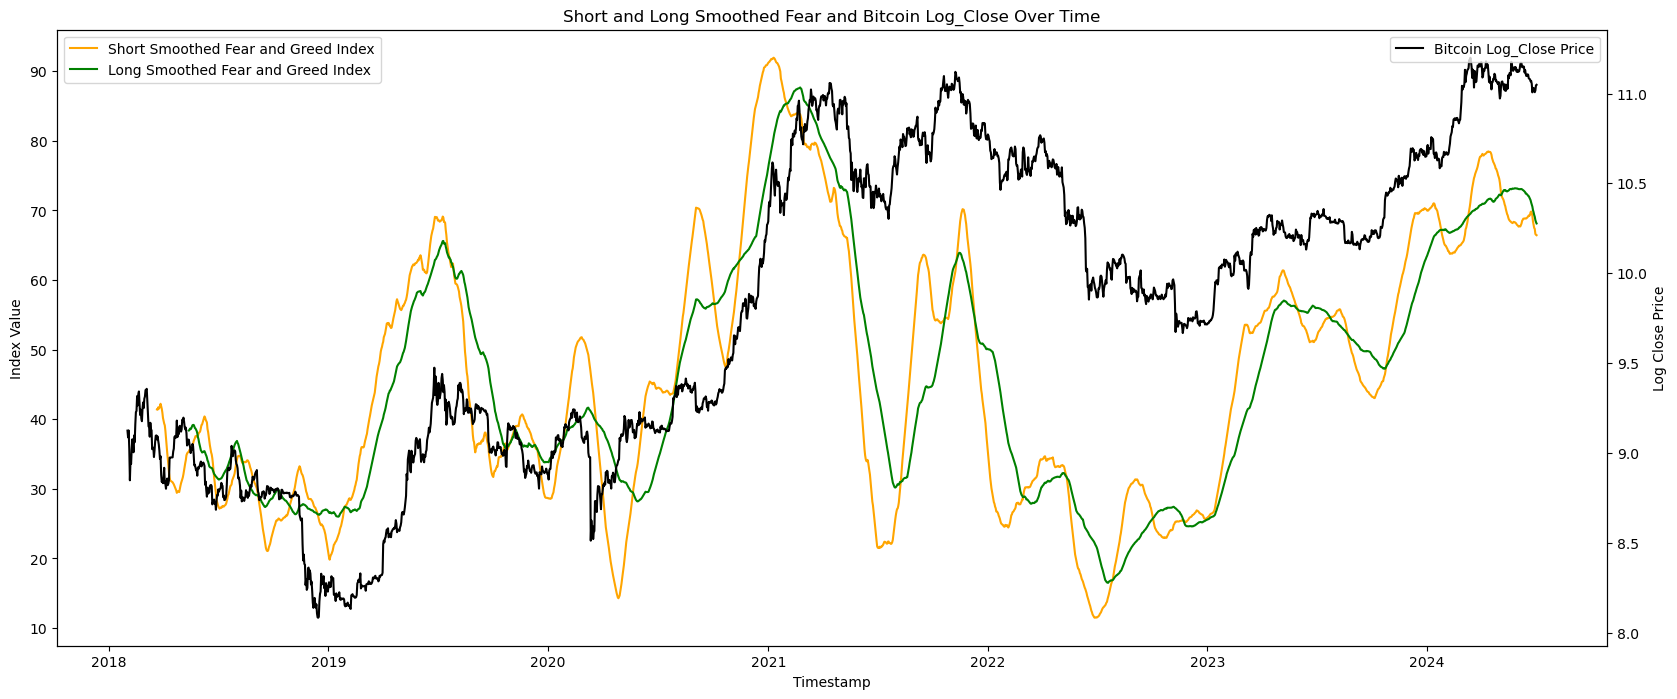

In [165]:
import matplotlib.pyplot as plt

# Calculate the rolling mean (smoothed average) with a window size of your choice (e.g., 20 and 100 days)
short_size = 50
df['short_smoothed_value'] = df['value'].rolling(window=short_size).mean()

long_size = 100
df['long_smoothed_value'] = df['value'].rolling(window=long_size).mean()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot Fear and Greed Index and smoothed values on primary y-axis
# ax1.plot(df.index, df['value'], label='Fear and Greed Index')
ax1.plot(df.index, df['short_smoothed_value'], label='Short Smoothed Fear and Greed Index', color='orange')
ax1.plot(df.index, df['long_smoothed_value'], label='Long Smoothed Fear and Greed Index', color='green')

# Set labels and legend for primary y-axis
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Index Value')
ax1.legend(loc='upper left')

# Create secondary y-axis for Bitcoin Log_Close Price
ax2 = ax1.twinx()
ax2.plot(df.index, df['Log_Close'], label='Bitcoin Log_Close Price', color='black')

# Set labels and legend for secondary y-axis
ax2.set_ylabel('Log Close Price')
ax2.legend(loc='upper right')

# Set title for the plot
plt.title('Short and Long Smoothed Fear and Bitcoin Log_Close Over Time')

# Display the plot
plt.show()


In [124]:
# box and whiskers by category
# Filter data by sentiment categories
extreme_fear_data = df[df['value_classification'] == 'Extreme Fear']['value']
fear_data = df[df['value_classification'] == 'Fear']['value']
neutral_data = df[df['value_classification'] == 'Neutral']['value']
greed_data = df[df['value_classification'] == 'Greed']['value']
extreme_greed_data = df[df['value_classification'] == 'Extreme Greed']['value']


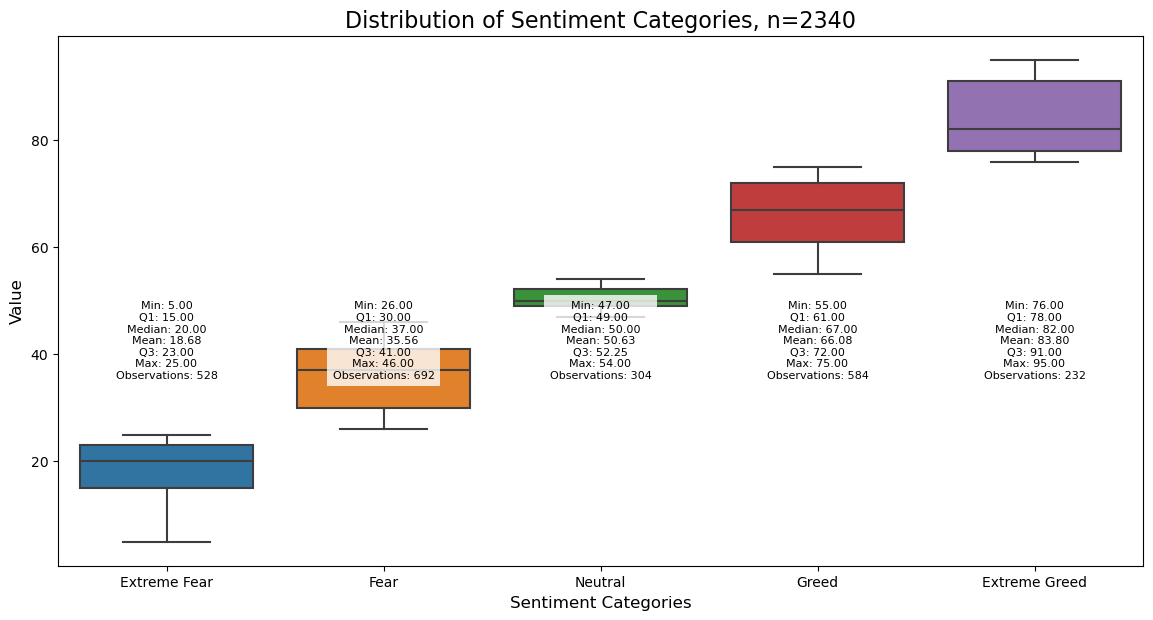

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine data into a single DataFrame for plotting
data_to_plot = pd.DataFrame({
    'Extreme Fear': extreme_fear_data,
    'Fear': fear_data,
    'Neutral': neutral_data,
    'Greed': greed_data,
    'Extreme Greed': extreme_greed_data
})

# Plot box and whisker plots
plt.figure(figsize=(14, 10))
sns.boxplot(data=data_to_plot)

# Add annotations for min, max, quartiles, mean, and counts beneath the plot
for i, col in enumerate(data_to_plot.columns):
    min_val = data_to_plot[col].min()
    max_val = data_to_plot[col].max()
    quartiles = data_to_plot[col].quantile([0.25, 0.5, 0.75])
    mean_val = data_to_plot[col].mean()
    obs_count = data_to_plot[col].count()
    stats_text = (f"Min: {min_val:.2f}\n"
                  f"Q1: {quartiles[0.25]:.2f}\n"
                  f"Median: {quartiles[0.5]:.2f}\n"
                  f"Mean: {mean_val:.2f}\n"
                  f"Q3: {quartiles[0.75]:.2f}\n"
                  f"Max: {max_val:.2f}\n"
                  f"Observations: {obs_count}")
    plt.text(i, plt.ylim()[0], stats_text, ha='center', va='top', 
             transform=plt.gca().get_xaxis_transform(), fontsize=8, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title(f'Distribution of Sentiment Categories, n={len(data_to_plot[col])}', fontsize=16)
plt.xlabel('Sentiment Categories', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Adjust the bottom margin to make room for the text
plt.subplots_adjust(bottom=0.35)

plt.show()

In [86]:
# Filter data by sentiment categories
extreme_fear_data = df[df['value_classification'] == 'Extreme Fear']['value']
fear_data = df[df['value_classification'] == 'Fear']['value']
neutral_data = df[df['value_classification'] == 'Neutral']['value']
greed_data = df[df['value_classification'] == 'Greed']['value']
extreme_greed_data = df[df['value_classification'] == 'Extreme Greed']['value']

print(f"extreme fear data: {extreme_fear_data.describe()}")
print(f"fear data: {fear_data.describe()}")
print(f"neutral_data data: {neutral_data.describe()}")
print(f"greed_data data: {greed_data.describe()}")
print(f"extreme_greed_data data: {extreme_greed_data.describe()}")

extreme fear data: count    528.000000
mean      18.683712
std        4.862859
min        5.000000
25%       15.000000
50%       20.000000
75%       23.000000
max       25.000000
Name: value, dtype: float64
fear data: count    692.000000
mean      35.560694
std        6.185793
min       26.000000
25%       30.000000
50%       37.000000
75%       41.000000
max       46.000000
Name: value, dtype: float64
neutral_data data: count    306.000000
mean      50.627451
std        2.198009
min       47.000000
25%       49.000000
50%       50.000000
75%       52.000000
max       54.000000
Name: value, dtype: float64
greed_data data: count    584.000000
mean      66.078767
std        6.515633
min       55.000000
25%       61.000000
50%       67.000000
75%       72.000000
max       75.000000
Name: value, dtype: float64
extreme_greed_data data: count    232.000000
mean      83.797414
std        6.507897
min       76.000000
25%       78.000000
50%       82.000000
75%       91.000000
max       95.0000

From these printouts of the numerical summaries (count, mean, standard deviation, min, quartiles, and max) for each sentiment category, you can derive several insights:

Distribution of Values:

Mean: Gives you an average value for each sentiment category. For instance, Extreme Fear has an average value of approximately 18.68, while Extreme Greed has an average value of 83.80.
Standard Deviation (std): Indicates the spread of values around the mean. A higher standard deviation suggests more variability in the data. Extreme Greed has a higher standard deviation (6.51) compared to Extreme Fear (4.86), indicating greater variability in values.
Range of Values:

Minimum (min) and Maximum (max): Provide the smallest and largest values within each sentiment category. For example, Extreme Fear ranges from a minimum of 5 to a maximum of 25, whereas Extreme Greed ranges from 76 to 95. This shows the range of values each sentiment category covers.
Percentiles (Quartiles):

25th Percentile (Q1), 50th Percentile (Median), and 75th Percentile (Q3): These values indicate the distribution of data points within each sentiment category. For instance, in the Fear category, 25% of values are below 30 (Q1), 50% are below 37 (Median), and 75% are below 41 (Q3). This helps understand the spread of data and where most values lie.
Count of Data Points:

Count: Shows the number of data points available for each sentiment category. This is crucial for understanding the sample size and reliability of the statistics presented. For instance, Extreme Greed has 232 data points, while Fear has 692.
Interpretation Example:
Extreme Fear: This category has a lower mean value (18.68) with a relatively narrow range (min 5, max 25). The values are tightly clustered around the mean, indicating less variability compared to categories with higher standard deviations.

Greed and Extreme Greed: These categories show higher mean values (66.08 and 83.80 respectively) and larger ranges (55 to 75 for Greed, 76 to 95 for Extreme Greed). They also have higher standard deviations, suggesting a wider spread of values and potentially more volatility in sentiment levels.

These insights can help in understanding the typical sentiment levels and their variability over time, which can be valuable for analyzing market sentiment trends or sentiment-driven behaviors.

In [126]:
import pandas as pd

# List of sentiment categories
sentiment_categories = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

# Function to calculate max consecutive days for a given sentiment
def calculate_max_consecutive_days(df, sentiment):
    consecutive_days = 0
    max_consecutive_days = 0
    
    for _, row in df.iterrows():
        if row['value_classification'] == sentiment:
            consecutive_days += 1
        else:
            max_consecutive_days = max(max_consecutive_days, consecutive_days)
            consecutive_days = 0
    
    # Check one last time after the loop ends
    max_consecutive_days = max(max_consecutive_days, consecutive_days)
    
    return max_consecutive_days

# Calculate and print max consecutive days for each sentiment
for sentiment in sentiment_categories:
    max_days = calculate_max_consecutive_days(df, sentiment)
    print(f"Maximum consecutive days in '{sentiment}' category: {max_days}")

Maximum consecutive days in 'Extreme Fear' category: 74
Maximum consecutive days in 'Fear' category: 27
Maximum consecutive days in 'Neutral' category: 28
Maximum consecutive days in 'Greed' category: 77
Maximum consecutive days in 'Extreme Greed' category: 76


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
# Load the combined data
df = pd.read_csv('fear_greed_btc_combined.csv', index_col='timestamp', parse_dates=True)

In [71]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv('fear_greed_btc_combined.csv')

# Convert 'timestamp' to datetime format if needed
df['timestamp'] = pd.to_datetime(df['timestamp'])


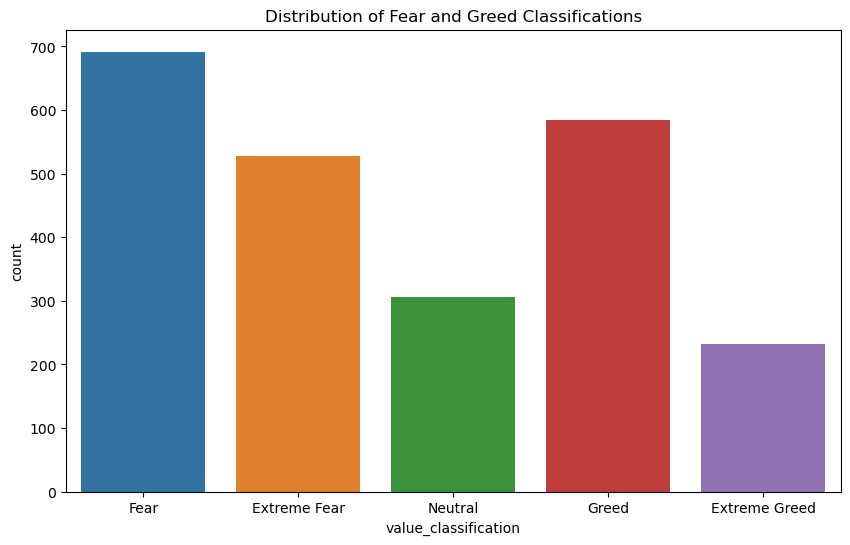

In [96]:
# Plot distribution of value classifications
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='value_classification')
plt.title('Distribution of Fear and Greed Classifications')
plt.show()

In [108]:
# Load the data from the CSV file
df = pd.read_csv('fear_greed_btc_combined.csv', index_col='timestamp', parse_dates=True)

df

,value,value_classification,Close
timestamp,,,
2018-02-01,30,Fear,9170.540039
2018-02-02,15,Extreme Fear,8830.750000
2018-02-03,40,Fear,9174.910156
2018-02-04,24,Extreme Fear,8277.009766
2018-02-05,11,Extreme Fear,6955.270020
...,...,...,...
2024-06-27,40,Fear,61604.800781
2024-06-28,47,Neutral,60320.136719
2024-06-29,30,Fear,60887.378906


In [127]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('fear_greed_btc_combined.csv', index_col='timestamp', parse_dates=True)

# Apply log scale to the 'Close' column
df['Log_Close'] = np.log(df['Close'])

# Display the first few rows to verify the transformation
print(df.head())

            value value_classification        Close  Log_Close
timestamp                                                     
2018-02-01     30                 Fear  9170.540039   9.123751
2018-02-02     15         Extreme Fear  8830.750000   9.085995
2018-02-03     40                 Fear  9174.910156   9.124228
2018-02-04     24         Extreme Fear  8277.009766   9.021237
2018-02-05     11         Extreme Fear  6955.270020   8.847255


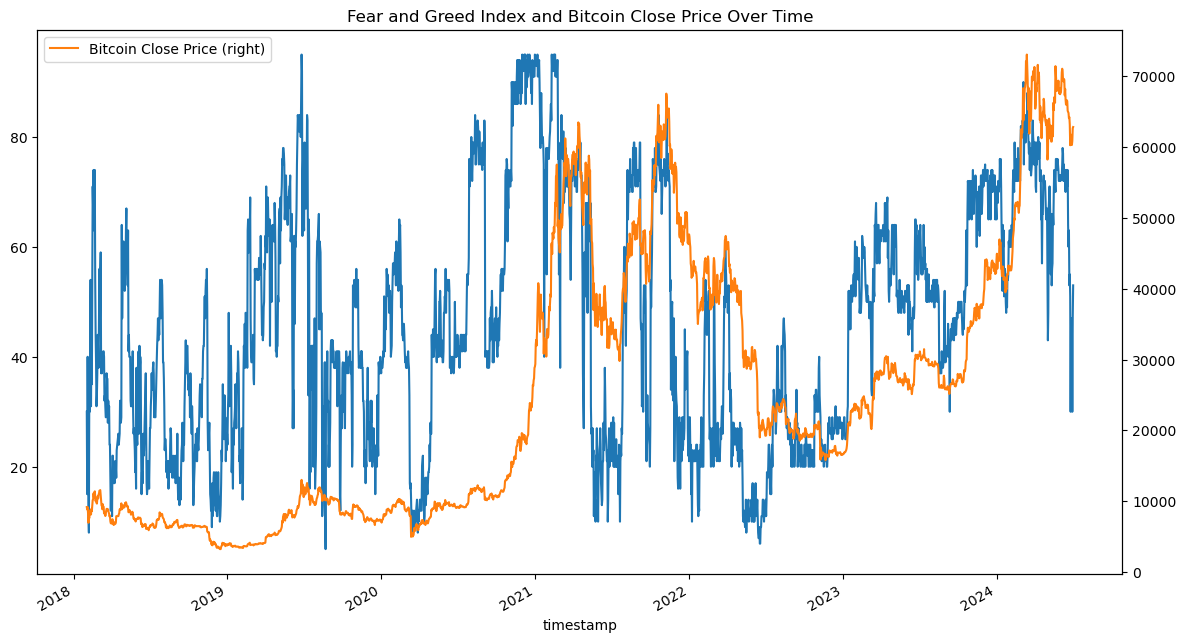

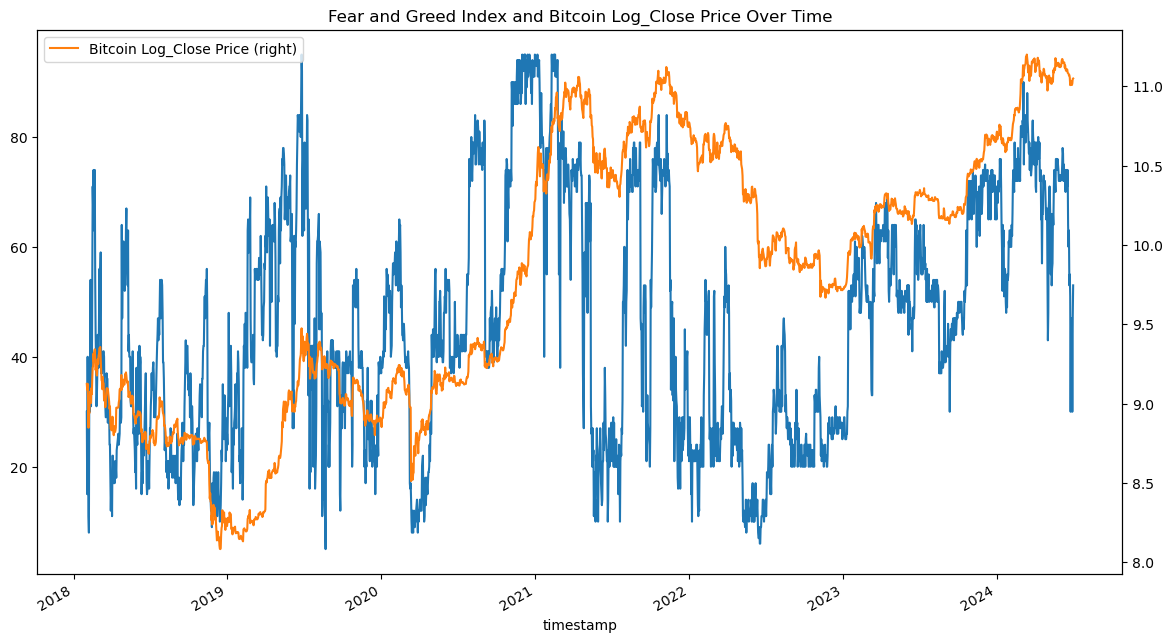

In [128]:
# Plot the value and Close over time
plt.figure(figsize=(14, 8))
df['value'].plot(label='Fear and Greed Index')
df['Close'].plot(label='Bitcoin Close Price', secondary_y=True)
plt.title('Fear and Greed Index and Bitcoin Close Price Over Time')
plt.legend()
plt.show()

# Plot the value and Close over time
plt.figure(figsize=(14, 8))
df['value'].plot(label='Fear and Greed Index')
df['Log_Close'].plot(label='Bitcoin Log_Close Price', secondary_y=True)
plt.title('Fear and Greed Index and Bitcoin Log_Close Price Over Time')
plt.legend()
plt.show()

In [133]:
# Extract month and quarter information
df['month'] = df.index.month
df['quarter'] = df.index.quarter

In [134]:
# Calculate monthly averages
monthly_avg = df.groupby('month')[['value', 'Close']].mean()
monthly_log_avg = df.groupby('month')[['value', 'Log_Close']].mean()

# Calculate quarterly averages
quarterly_avg = df.groupby('quarter')[['value', 'Close']].mean()
quarterly_log_avg = df.groupby('quarter')[['value', 'Log_Close']].mean()

In [135]:
print(monthly_avg)
print(monthly_log_avg)
print(quarterly_avg)
print(quarterly_log_avg)

           value         Close
month                         
1      47.220430  25189.537943
2      54.626263  26188.460484
3      49.046083  29953.032670
4      48.275362  30870.445058
5      46.400922  27991.265704
6      41.290476  25655.734203
7      40.518717  19142.875762
8      47.618280  20820.642389
9      36.633333  19855.951145
10     45.306452  22350.402906
11     51.161111  24207.007996
12     44.387097  23624.058331
           value  Log_Close
month                      
1      47.220430   9.815648
2      54.626263   9.823490
3      49.046083   9.857909
4      48.275362   9.922368
5      46.400922   9.921199
6      41.290476   9.858396
7      40.518717   9.680127
8      47.618280   9.735886
9      36.633333   9.676571
10     45.306452   9.722720
11     51.161111   9.767957
12     44.387097   9.716143
             value         Close
quarter                         
1        50.319468  27238.564597
2        45.320189  28157.714459
3        41.641953  19939.291967
4        

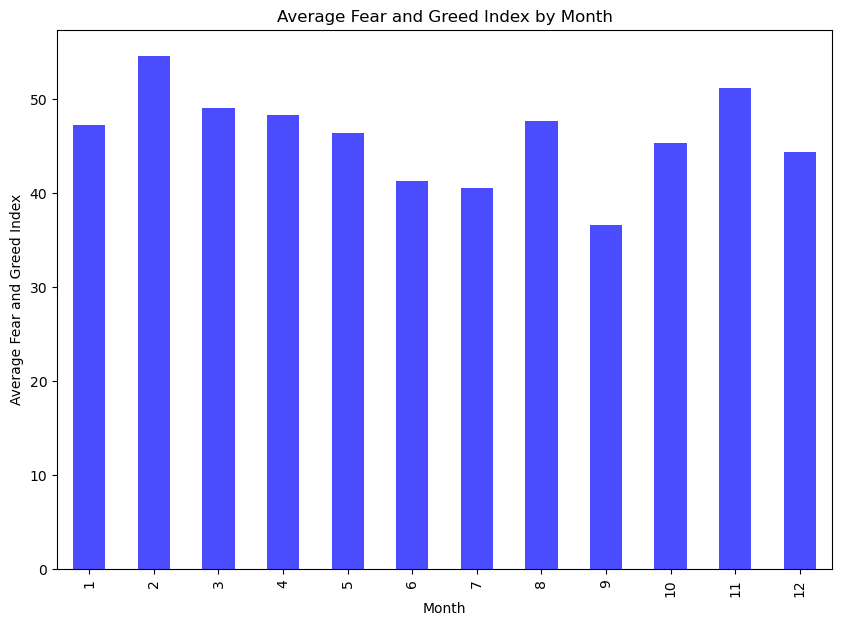

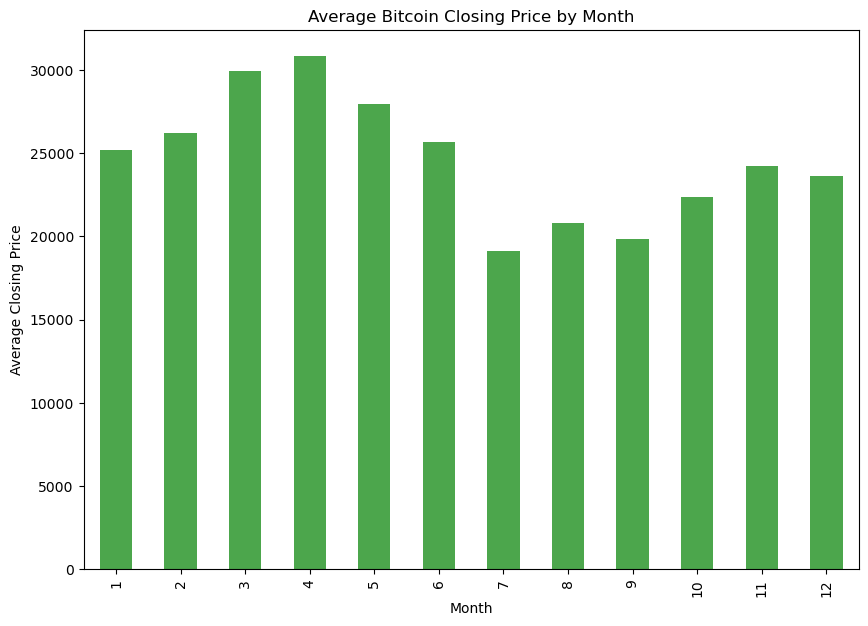

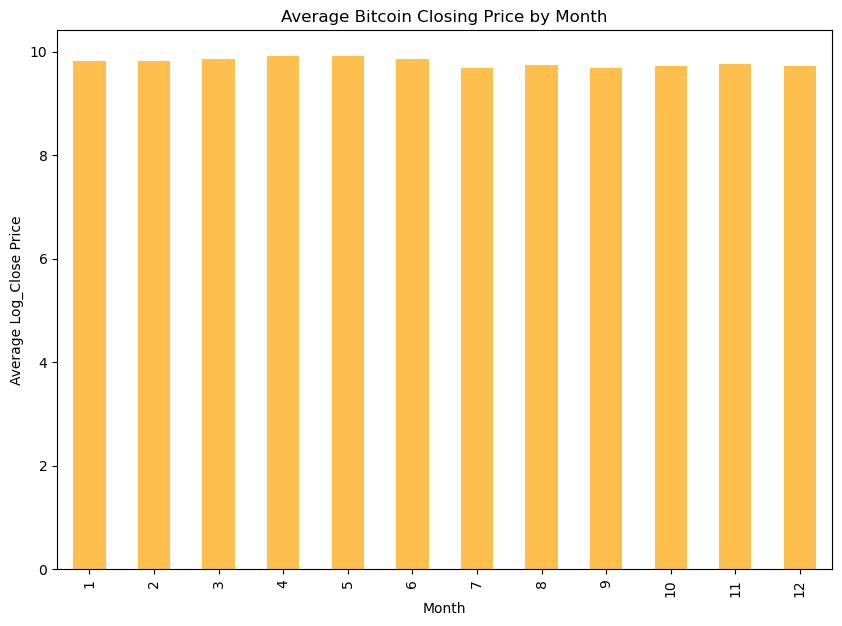

In [137]:
# Plot the monthly averages
plt.figure(figsize=(10, 7))
monthly_avg['value'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Fear and Greed Index by Month')
plt.xlabel('Month')
plt.ylabel('Average Fear and Greed Index')
plt.show()

plt.figure(figsize=(10, 7))
monthly_avg['Close'].plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Bitcoin Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.show()

plt.figure(figsize=(10, 7))
monthly_log_avg['Log_Close'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Bitcoin Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Log_Close Price')
plt.show()

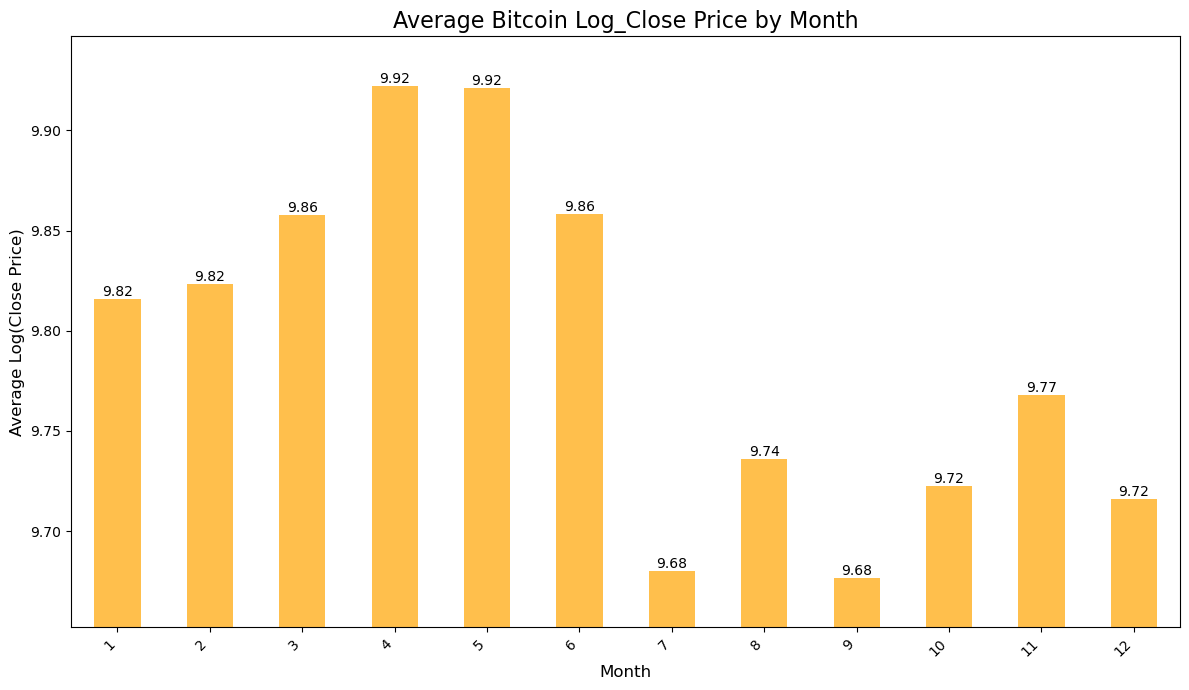

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Plot the bar chart
ax = monthly_log_avg['Log_Close'].plot(kind='bar', color='orange', alpha=0.7)

# Calculate the y-axis range
y_min = monthly_log_avg['Log_Close'].min()
y_max = monthly_log_avg['Log_Close'].max()
y_range = y_max - y_min

# Set y-axis limits with some padding
plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Customize the plot
plt.title('Average Bitcoin Log_Close Price by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Log(Close Price)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(monthly_log_avg['Log_Close']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

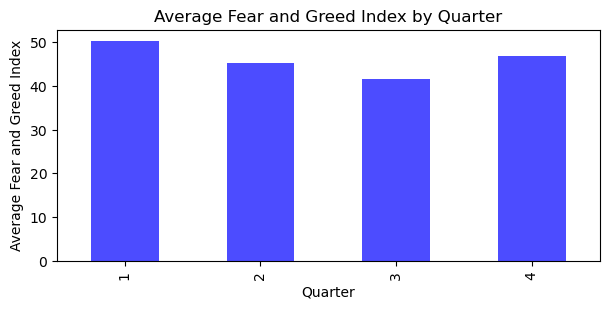

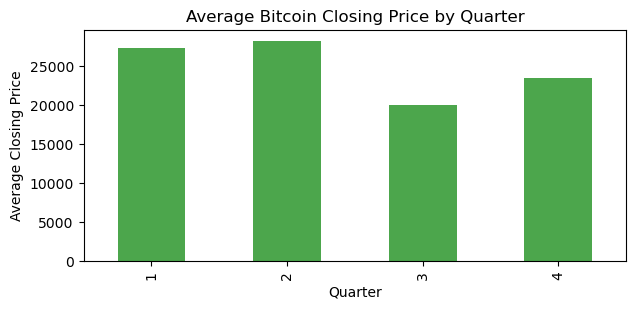

In [145]:
# Plot the quarterly averages
plt.figure(figsize=(7, 3))
quarterly_avg['value'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Fear and Greed Index by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Fear and Greed Index')
plt.show()

plt.figure(figsize=(7, 3))
quarterly_avg['Close'].plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Bitcoin Closing Price by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Closing Price')
plt.show()

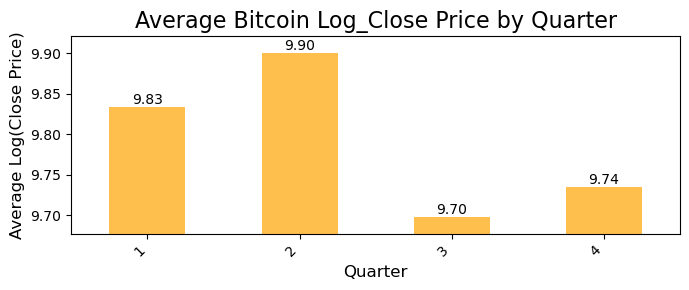

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))

# Plot the bar chart
ax = quarterly_log_avg['Log_Close'].plot(kind='bar', color='orange', alpha=0.7)

# Calculate the y-axis range
y_min = quarterly_log_avg['Log_Close'].min()
y_max = quarterly_log_avg['Log_Close'].max()
y_range = y_max - y_min

# Set y-axis limits with some padding
plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Customize the plot
plt.title('Average Bitcoin Log_Close Price by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Average Log(Close Price)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(quarterly_log_avg['Log_Close']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

In [147]:
# Calculate correlation
correlation = df['value'].corr(df['Close'])
print(f"Correlation between Fear and Greed Index and Bitcoin Closing Price: {correlation}")

correlation_log = df['value'].corr(df['Log_Close'])
print(f"Correlation between Fear and Greed Index and Bitcoin Log_Closing Price: {correlation_log}")

# Calculate autocorrelation for Fear and Greed Index
autocorrelation = df['value'].autocorr()
print(f"Autocorrelation of Fear and Greed Index: {autocorrelation}")

# autocorrelation_log = df['value'].autocorr()
# print(f"Autocorrelation of Fear and Greed Index: {autocorrelation_log}")

Correlation between Fear and Greed Index and Bitcoin Closing Price: 0.40017205552249885
Correlation between Fear and Greed Index and Bitcoin Log_Closing Price: 0.36942492764475043
Autocorrelation of Fear and Greed Index: 0.9573420243548406


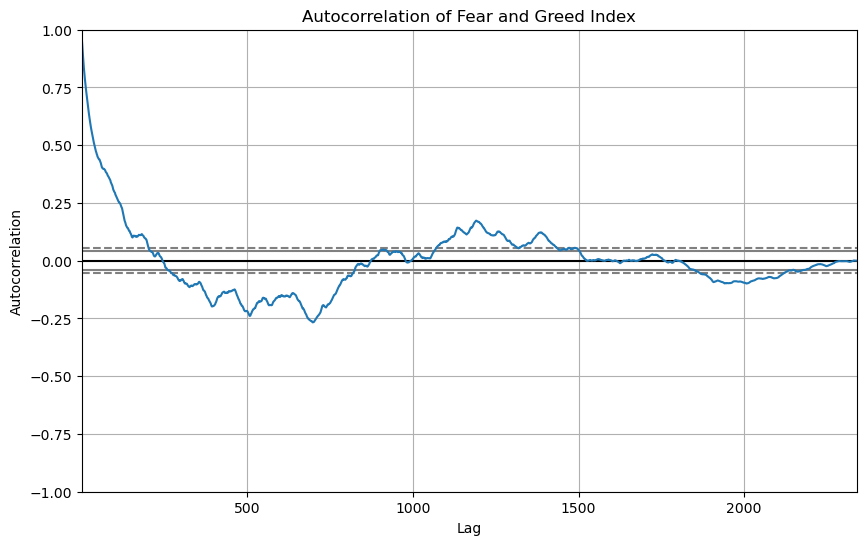

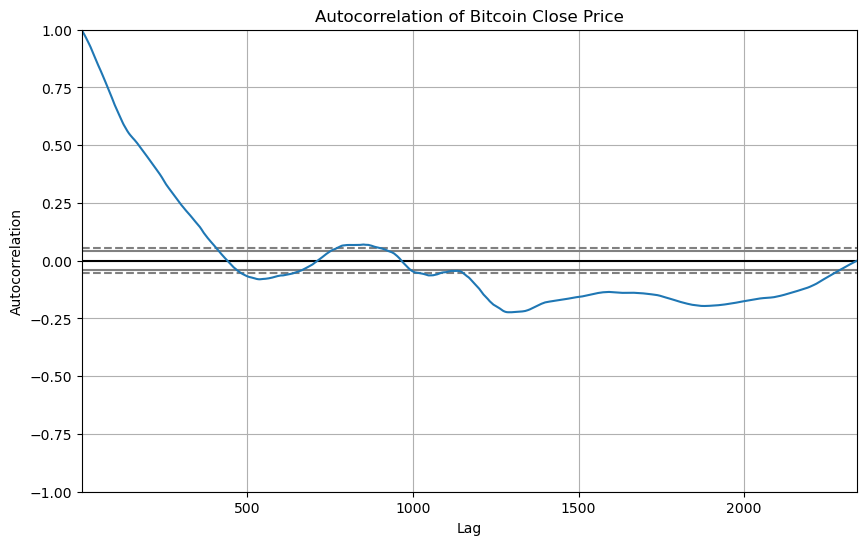

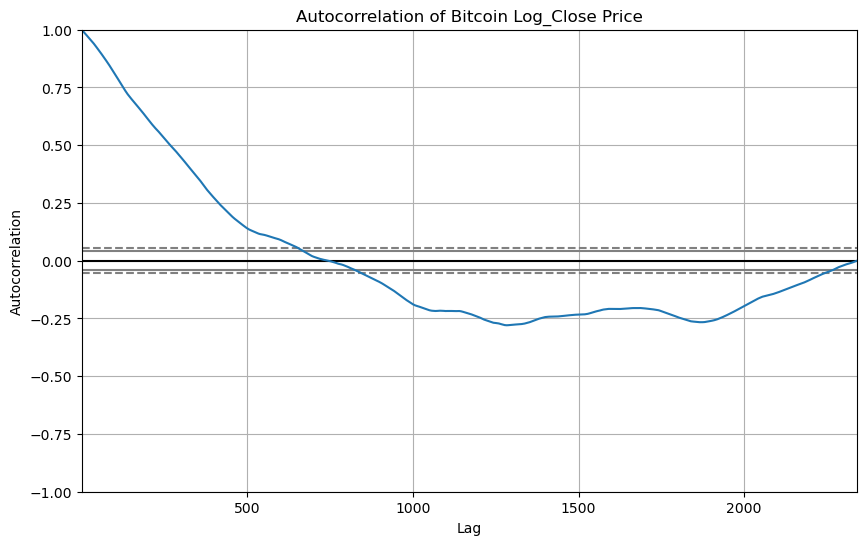

In [148]:
# Autocorrelation plots
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['value'])
plt.title('Autocorrelation of Fear and Greed Index')
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation of Bitcoin Close Price')
plt.show()

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Log_Close'])
plt.title('Autocorrelation of Bitcoin Log_Close Price')
plt.show()

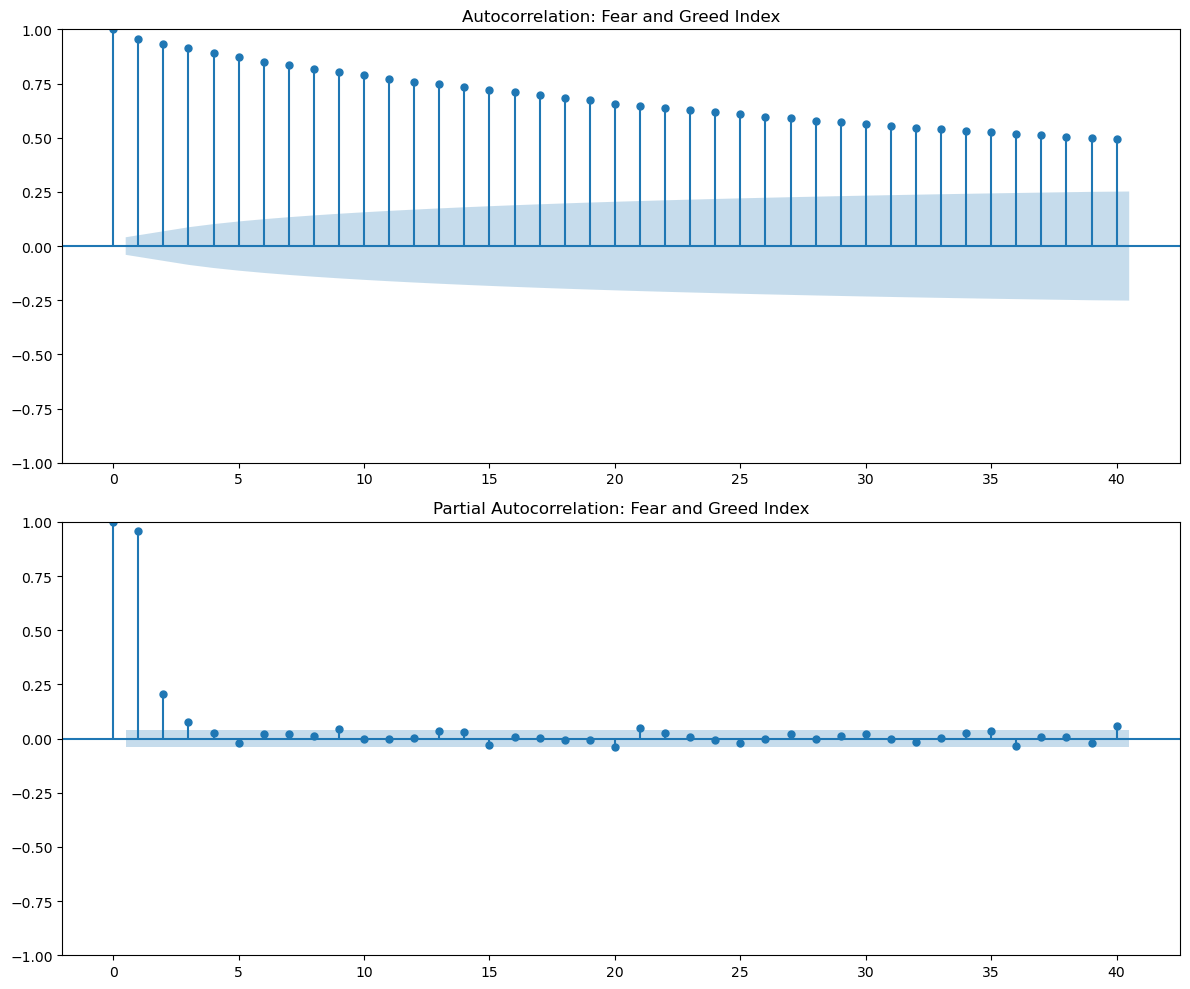

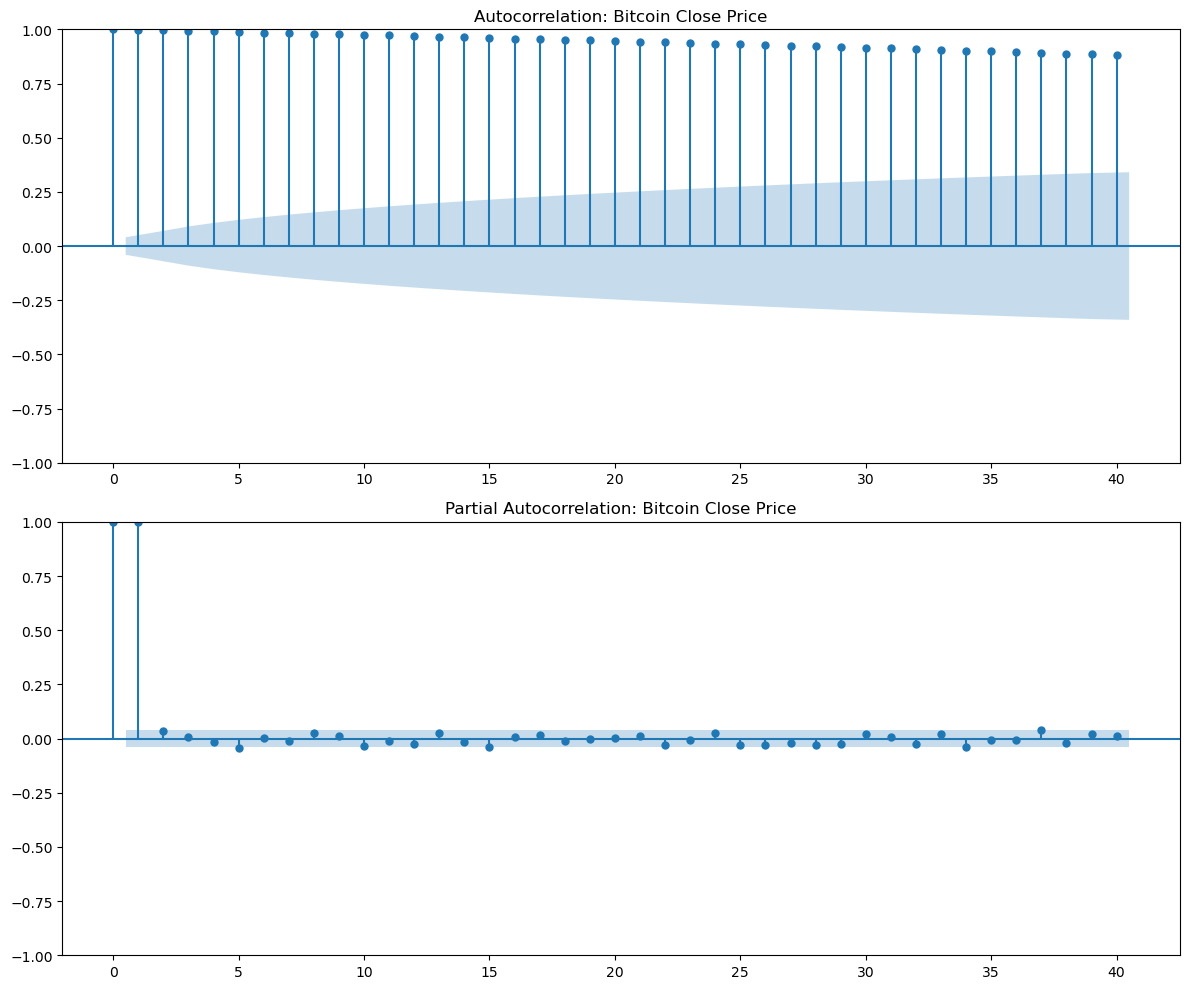

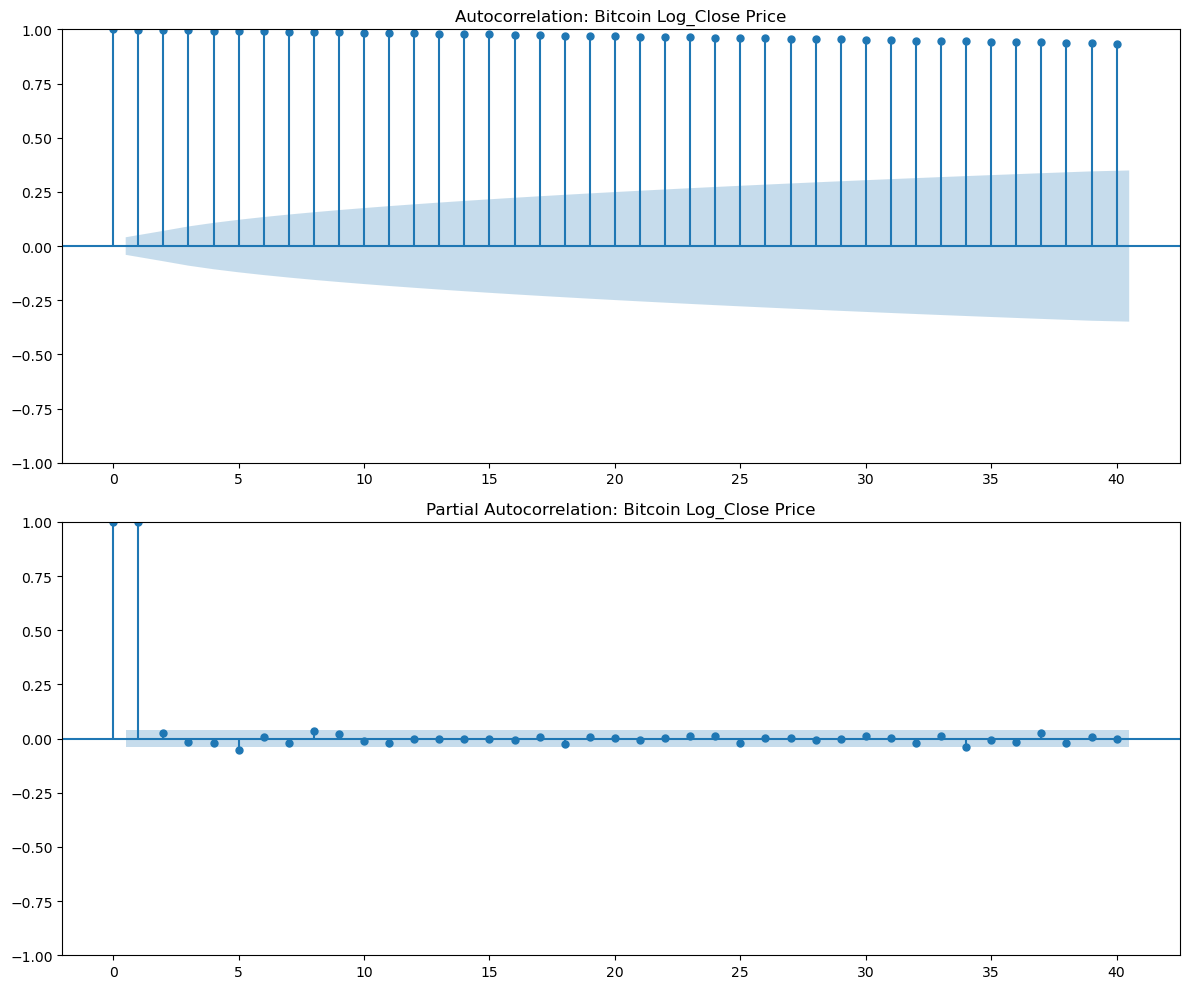

In [149]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to create both ACF and PACF plots
def plot_acf_pacf(series, title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # ACF plot
    plot_acf(series, ax=ax1, lags=40)
    ax1.set_title(f'Autocorrelation: {title}')
    
    # PACF plot
    plot_pacf(series, ax=ax2, lags=40)
    ax2.set_title(f'Partial Autocorrelation: {title}')
    
    plt.tight_layout()
    plt.show()

# Create plots for each series
plot_acf_pacf(df['value'], 'Fear and Greed Index')
plot_acf_pacf(df['Close'], 'Bitcoin Close Price')
plot_acf_pacf(df['Log_Close'], 'Bitcoin Log_Close Price')

In [150]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf

def get_acf_pacf_values(series, nlags=40):
    acf_values = acf(series, nlags=nlags)
    pacf_values = pacf(series, nlags=nlags)
    
    df = pd.DataFrame({
        'Lag': range(nlags + 1),
        'ACF': acf_values,
        'PACF': pacf_values
    })
    
    return df

# Calculate ACF and PACF for each series
fear_greed_acf_pacf = get_acf_pacf_values(df['value'])
close_acf_pacf = get_acf_pacf_values(df['Close'])
log_close_acf_pacf = get_acf_pacf_values(df['Log_Close'])

# Print the first few rows of each DataFrame
print("Fear and Greed Index ACF/PACF:")
print(fear_greed_acf_pacf.head())
print("\nBitcoin Close Price ACF/PACF:")
print(close_acf_pacf.head())
print("\nBitcoin Log_Close Price ACF/PACF:")
print(log_close_acf_pacf.head())

# To get the full DataFrames, you can use:
# fear_greed_acf_pacf.to_csv('fear_greed_acf_pacf.csv', index=False)
# close_acf_pacf.to_csv('close_acf_pacf.csv', index=False)
# log_close_acf_pacf.to_csv('log_close_acf_pacf.csv', index=False)

Fear and Greed Index ACF/PACF:
   Lag       ACF      PACF
0    0  1.000000  1.000000
1    1  0.957210  0.957620
2    2  0.933554  0.208730
3    3  0.912932  0.078488
4    4  0.892662  0.024054

Bitcoin Close Price ACF/PACF:
   Lag       ACF      PACF
0    0  1.000000  1.000000
1    1  0.997412  0.997838
2    2  0.995015  0.042777
3    3  0.992656  0.009326
4    4  0.990212 -0.020095

Bitcoin Log_Close Price ACF/PACF:
   Lag       ACF      PACF
0    0  1.000000  1.000000
1    1  0.998510  0.998937
2    2  0.997104  0.038230
3    3  0.995644 -0.024589
4    4  0.994132 -0.027269


Thank you for providing the data and context. Let's interpret these results for each series:

Fear and Greed Index:


ACF: Shows very high autocorrelation that decays slowly. Even at lag 4, the autocorrelation is still 0.893, indicating strong persistence in the series.
PACF: Shows a very high value at lag 1 (0.958), then drops significantly at lag 2 (0.209) and continues to decrease.

Interpretation: This suggests that the Fear and Greed Index has strong short-term memory. Today's value is highly influenced by yesterday's value, with some influence from two days ago. This could indicate that market sentiment tends to persist for several days.

Bitcoin Close Price:


ACF: Extremely high autocorrelation that decays very slowly. Even at lag 4, it's still 0.990.
PACF: Very high at lag 1 (0.998), then drops dramatically to near zero for subsequent lags.

Interpretation: This is typical of a non-stationary series, which is common in financial price data. The price today is almost perfectly correlated with yesterday's price, which is expected for asset prices. The PACF suggests that most of the correlation structure can be captured by a lag-1 relationship.

Bitcoin Log_Close Price:


ACF: Very similar to the Close Price, with extremely high autocorrelation decaying very slowly.
PACF: Again, very high at lag 1 (0.999), then drops to near zero.

Interpretation: The log transformation hasn't substantially changed the autocorrelation structure. This still indicates a non-stationary series with strong dependence on the previous day's price.
General Observations and Usefulness:

Non-stationarity: Both Bitcoin price series (regular and log) show signs of non-stationarity. This suggests that for many time series analyses or forecasting models, you might need to difference the series (i.e., work with price changes rather than price levels).
Strong Persistence: All series show strong persistence, meaning that values tend to stay high when they're high and low when they're low. This could be useful for short-term forecasting.
AR(1) Structure: The PACF patterns, especially for the Bitcoin prices, suggest that an AR(1) model might be appropriate. This means that a model using just the previous day's value could potentially capture much of the series' behavior.
Sentiment Lag: The Fear and Greed Index shows more complex autocorrelation structure than the prices. This could indicate that sentiment takes longer to shift than prices do.
Potential for Mean Reversion: While the Bitcoin price series don't show clear mean reversion, the Fear and Greed Index might. This could be useful for predicting sentiment shifts.
Forecasting: These patterns suggest that simple models like ARIMA(1,1,0) or ARIMA(1,1,1) might be effective for short-term price forecasting.
Risk Management: The strong autocorrelations in the Bitcoin price suggest that volatility tends to cluster, which is important for risk management.
Market Efficiency: The strong autocorrelations, especially in price, might indicate some level of market inefficiency, potentially offering opportunities for trading strategies.

Remember, while these patterns are informative, they're based on aggregate behavior. Short-term movements can still be unpredictable, and past patterns don't guarantee future behavior. Always combine this technical analysis with fundamental analysis and risk management for any practical applications.

In [41]:
# Lagged analysis
for lag in range(1, 8):
    df[f'value_lag_{lag}'] = df['value'].shift(lag)
    df[f'close_lag_{lag}'] = df['Close'].shift(lag)

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[float, int]).columns
lagged_correlations = df[numeric_cols].corr()

# Plot lagged

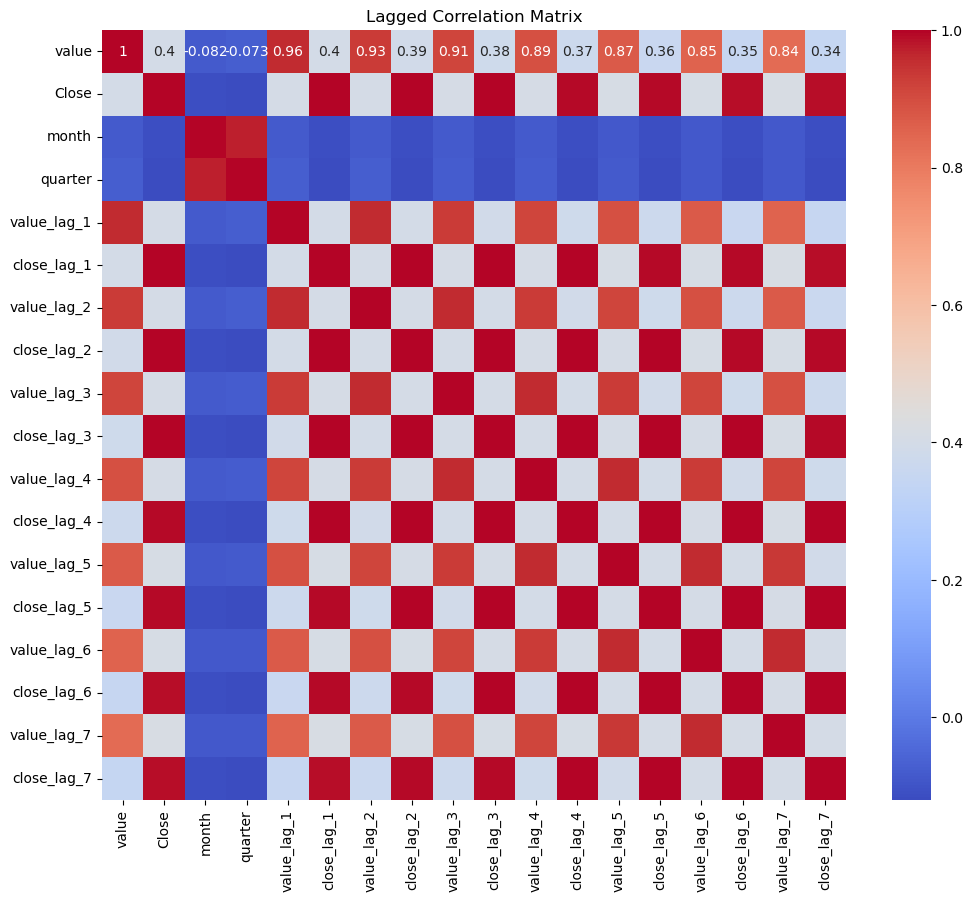

In [42]:
# Plot lagged correlations
plt.figure(figsize=(12, 10))
sns.heatmap(lagged_correlations, annot=True, cmap='coolwarm')
plt.title('Lagged Correlation Matrix')
plt.show()

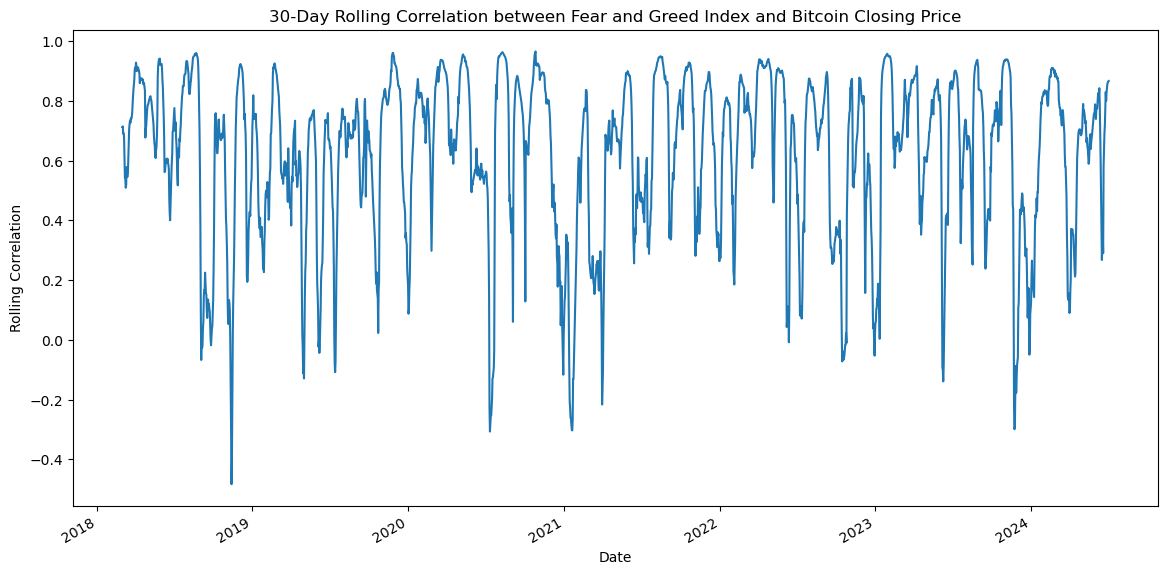

In [43]:
# Calculate rolling correlation with a window of 30 days
rolling_corr = df['value'].rolling(window=30).corr(df['Close'])

# Plot rolling correlation
plt.figure(figsize=(14, 7))
rolling_corr.plot()
plt.title('30-Day Rolling Correlation between Fear and Greed Index and Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.show()


The ratio of the daily percent change in closing price to the daily percent change in the Fear and Greed Index can provide insights into the relationship between Bitcoin price movements and changes in market sentiment. Here's how you can interpret this ratio:

Understanding the Ratio:

Ratio > 1: Indicates that the percentage change in Bitcoin price is greater than the percentage change in the Fear and Greed Index. This could suggest that price movements are more volatile or responsive compared to changes in sentiment.

Ratio < 1: Indicates that the percentage change in the Fear and Greed Index is greater than the percentage change in Bitcoin price. This could suggest that sentiment is changing more rapidly than the price.

Ratio ≈ 1: Indicates that the percentage changes in Bitcoin price and the Fear and Greed Index are similar. This could suggest a balanced response between price and sentiment changes.
Potential Insights:

High Ratio Periods: During periods when the ratio is consistently high, it might indicate that market sentiment (Fear and Greed Index) is not fully capturing the extent of price movements. This could be a signal that external factors, other than sentiment, are driving the price.

Low Ratio Periods: During periods when the ratio is consistently low, it might indicate that sentiment is overreacting compared to actual price movements. This could suggest that the market sentiment is driven more by emotions rather than fundamental price changes.

Trend Analysis: Analyzing the trend of this ratio over time can provide insights into how the relationship between price and sentiment evolves. For example, a rising trend could indicate increasing sensitivity of price to sentiment changes.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the combined data
df = pd.read_csv('fear_greed_btc_combined.csv', index_col='timestamp', parse_dates=True)

# Ensure that all relevant columns are numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate the daily percent change for Bitcoin price and Fear and Greed Index
df['pct_change_close'] = df['Close'].pct_change() * 100
df['pct_change_value'] = df['value'].pct_change() * 100

# Drop rows with NaN values resulting from percent change calculation
df.dropna(inplace=True)

# Calculate the change ratio
df['change_ratio'] = df['pct_change_close'] / df['pct_change_value']

# Replace inf and -inf with NaN
df['change_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values by dropping them (or you could fill them with a specific value)
df.dropna(subset=['change_ratio'], inplace=True)

# df.to_csv("inspect.csv")

# Describe the change ratio to inspect for anomalies
# print(df['change_ratio'].describe())

/var/folders/j3/f2pn80cx63z808kw83_jxw3w0000gn/T/ipykernel_41419/1971169882.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['change_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


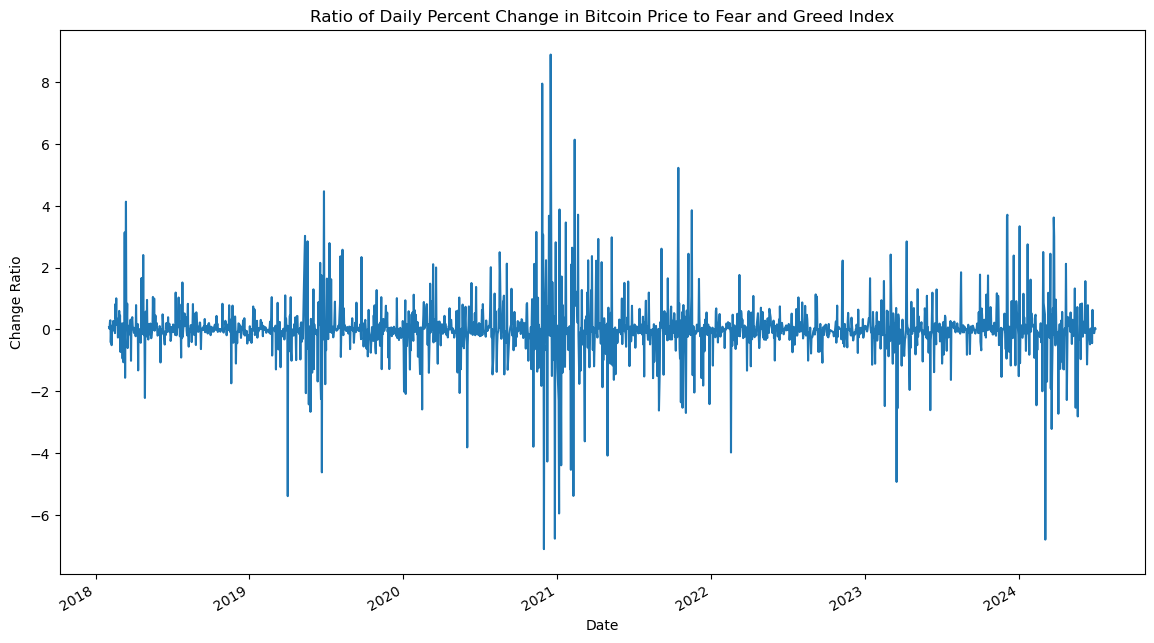

In [45]:
# Plot the ratio over time
plt.figure(figsize=(14, 8))
df['change_ratio'].plot()
plt.title('Ratio of Daily Percent Change in Bitcoin Price to Fear and Greed Index')
plt.xlabel('Date')
plt.ylabel('Change Ratio')
plt.show()

In [46]:
# Describe the ratio to understand its distribution
ratio_description = df['change_ratio'].describe()
print(ratio_description)

count    2063.000000
mean        0.007137
std         0.897558
min        -7.091371
25%        -0.170972
50%        -0.004901
75%         0.168370
max         8.874171
Name: change_ratio, dtype: float64


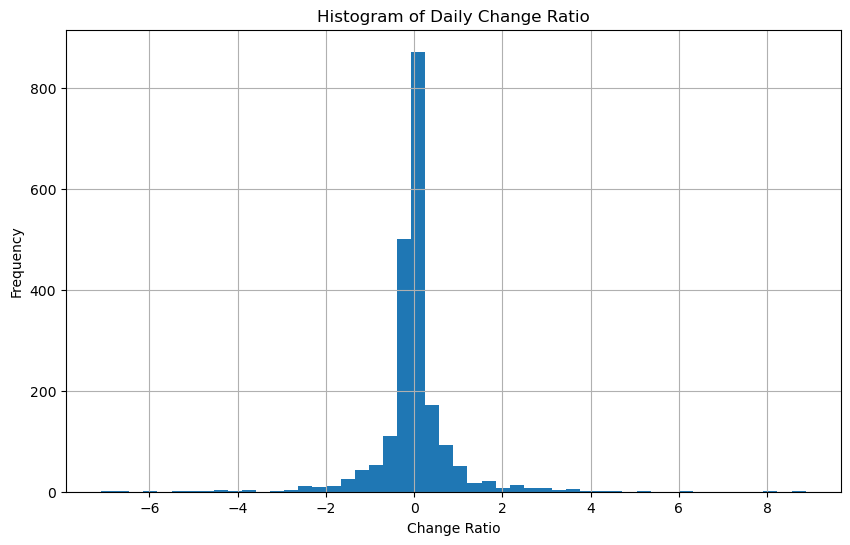

In [47]:
# Plot histogram of the ratio
plt.figure(figsize=(10, 6))
df['change_ratio'].hist(bins=50)
plt.title('Histogram of Daily Change Ratio')
plt.xlabel('Change Ratio')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Correlation between price percent change and Fear and Greed Index percent change
correlation = df['price_pct_change'].corr(df['fng_pct_change'])
print(f"Correlation between daily percent changes: {correlation}")

KeyError: 'price_pct_change'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the combined data
df = pd.read_csv('fear_greed_btc_combined.csv', index_col='timestamp', parse_dates=True)

# Ensure that all relevant columns are numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate the daily percent change for Bitcoin price and Fear and Greed Index
df['pct_change_close'] = df['Close'].pct_change() * 100
df['pct_change_value'] = df['value'].pct_change() * 100

# Drop rows with NaN values resulting from percent change calculation
df.dropna(inplace=True)

# Calculate the change ratio
df['change_ratio'] = df['pct_change_close'] / df['pct_change_value']

# Replace inf and -inf with NaN
df['change_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values by dropping them (or you could fill them with a specific value)
df.dropna(subset=['change_ratio'], inplace=True)

# Describe the change ratio to inspect for anomalies
print(df['change_ratio'].describe())


count    2063.000000
mean        0.007137
std         0.897558
min        -7.091371
25%        -0.170972
50%        -0.004901
75%         0.168370
max         8.874171
Name: change_ratio, dtype: float64


/var/folders/j3/f2pn80cx63z808kw83_jxw3w0000gn/T/ipykernel_39872/2515290469.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['change_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


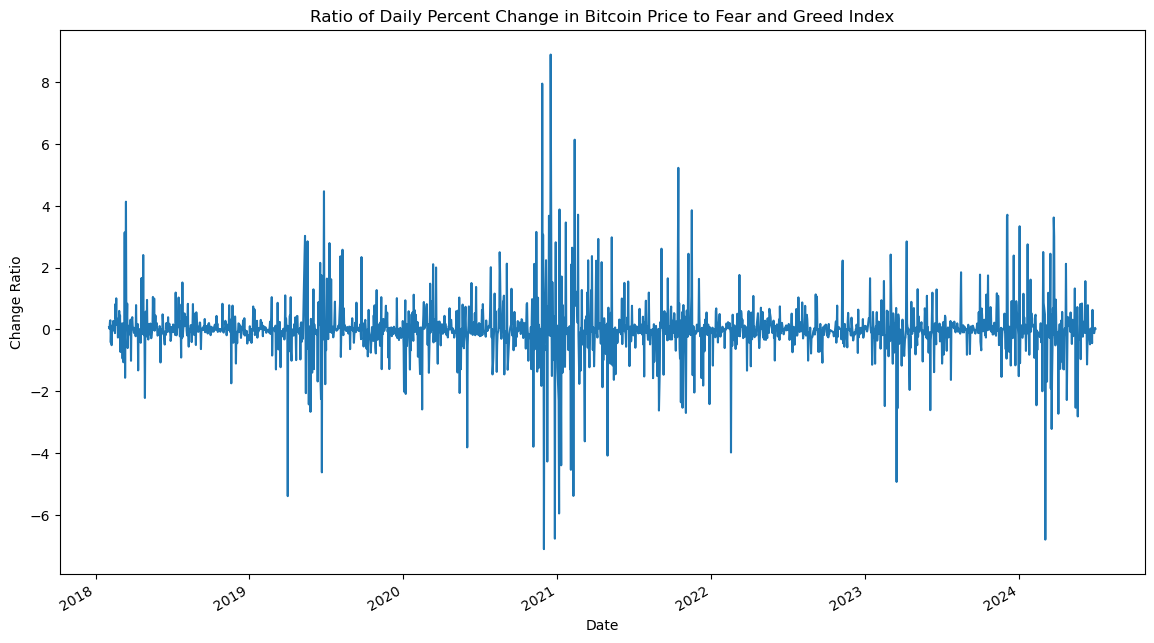

In [ ]:
# Plot the ratio over time
plt.figure(figsize=(14, 8))
df['change_ratio'].plot()
plt.title('Ratio of Daily Percent Change in Bitcoin Price to Fear and Greed Index')
plt.xlabel('Date')
plt.ylabel('Change Ratio')
plt.show()

count    2063.000000
mean        0.007137
std         0.897558
min        -7.091371
25%        -0.170972
50%        -0.004901
75%         0.168370
max         8.874171
Name: change_ratio, dtype: float64


/var/folders/j3/f2pn80cx63z808kw83_jxw3w0000gn/T/ipykernel_39872/3938440658.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['change_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


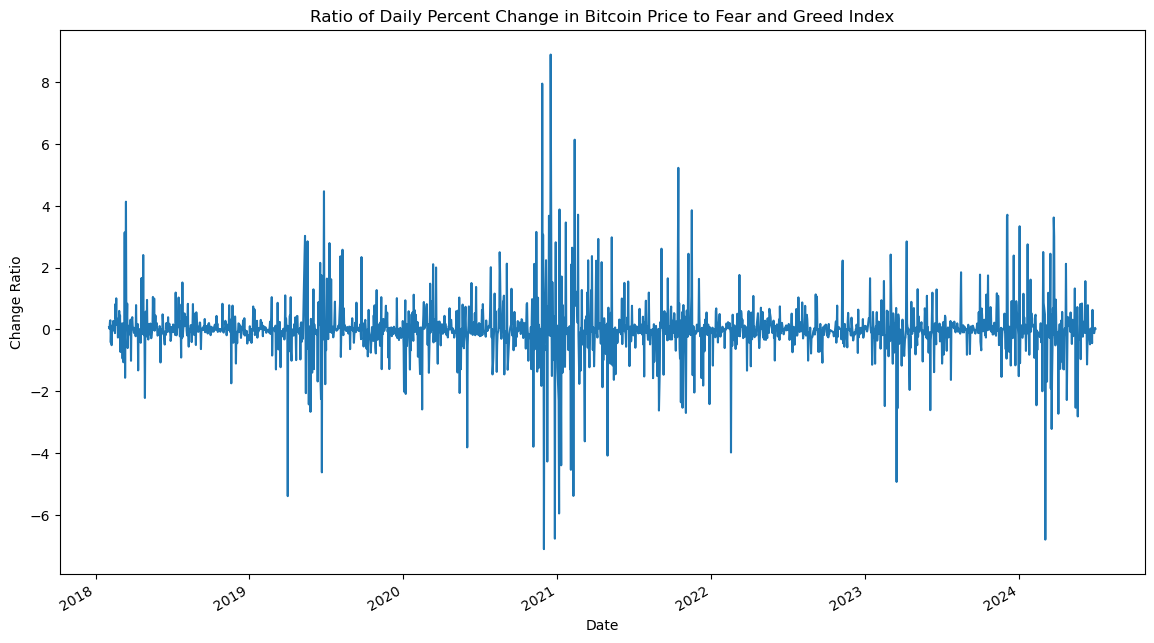

Correlation between daily percent changes: 0.02663357183289675


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the combined data
df = pd.read_csv('fear_greed_btc_combined.csv', index_col='timestamp', parse_dates=True)

# Ensure that all relevant columns are numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate the daily percent change for Bitcoin price and Fear and Greed Index
df['price_pct_change'] = df['Close'].pct_change() * 100
df['fng_pct_change'] = df['value'].pct_change() * 100

# Drop rows with NaN values resulting from percent change calculation
df.dropna(inplace=True)

# Calculate the change ratio
df['change_ratio'] = df['price_pct_change'] / df['fng_pct_change']

# Replace inf and -inf with NaN
df['change_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values by dropping them (or you could fill them with a specific value)
df.dropna(subset=['change_ratio'], inplace=True)

# Describe the change ratio to inspect for anomalies
print(df['change_ratio'].describe())

# Plot the ratio over time
plt.figure(figsize=(14, 8))
df['change_ratio'].plot()
plt.title('Ratio of Daily Percent Change in Bitcoin Price to Fear and Greed Index')
plt.xlabel('Date')
plt.ylabel('Change Ratio')
plt.show()

# Correlation between price percent change and Fear and Greed Index percent change
correlation = df['price_pct_change'].corr(df['fng_pct_change'])
print(f"Correlation between daily percent changes: {correlation}")


In [ ]:
# Lagged correlation analysis

for lag in range(1, 8):
    df[f'fng_pct_change_lag_{lag}'] = df['fng_pct_change'].shift(lag)

lagged_correlations = [df['price_pct_change'].corr(df[f'fng_pct_change_lag_{lag}']) for lag in range(1, 8)]
print("Lagged Correlations:", lagged_correlations)


Lagged Correlations: [0.011848364287011895, -0.005065798600246442, 0.05470138177071202, -0.02698729315712657, 0.012008659795089593, -0.03849013358601812, 0.03624681874500558]


In [ ]:
# # combining multiple indicators

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# X = df[['fng_pct_change', 'some_other_indicator']]
# y = df['price_pct_change']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# r_squared = model.score(X_test, y_test)
# print(f"R-squared: {r_squared}")


In [ ]:
# segmentation analysis

bull_market = df[df['Close'] > df['Close'].rolling(window=200).mean()]
bear_market = df[df['Close'] <= df['Close'].rolling(window=200).mean()]

bull_correlation = bull_market['price_pct_change'].corr(bull_market['fng_pct_change'])
bear_correlation = bear_market['price_pct_change'].corr(bear_market['fng_pct_change'])

print(f"Bull Market Correlation: {bull_correlation}")
print(f"Bear Market Correlation: {bear_correlation}")


Bull Market Correlation: -0.011626959496060378
Bear Market Correlation: 0.03540493368071313


In [ ]:
import pandas as pd

# Assuming df is your combined dataframe with Fear and Greed Index and Bitcoin prices

# Define the correlation threshold
threshold = 0.3

# Initialize a list to store pairs of columns and their correlations
high_correlation_pairs = []

# Iterate over each pair of columns (excluding non-numeric columns like 'timestamp')
for col1 in df.select_dtypes(include='number').columns:
    for col2 in df.select_dtypes(include='number').columns:
        if col1 != col2:  # Ensure we don't correlate a column with itself
            correlation = df[col1].corr(df[col2])
            if abs(correlation) > threshold:
                high_correlation_pairs.append((col1, col2, correlation))

# Print high correlation pairs found
for pair in high_correlation_pairs:
    print(f"High correlation found between '{pair[0]}' and '{pair[1]}': {pair[2]}")


High correlation found between 'value' and 'Close': 0.38582915688169833
High correlation found between 'Close' and 'value': 0.3858291568816983


In [ ]:
import pandas as pd

# Assuming df is your combined dataframe with Fear and Greed Index and Bitcoin prices

# Define the correlation threshold
threshold = 0.3

# Initialize a list to store pairs of columns and their correlations
high_correlation_pairs = []

# Define the range of lags you want to test
lags = range(1, 6)  # Adjust as needed based on your analysis

# Iterate over each lag and compute correlations
for lag in lags:
    # Create lagged versions of 'Close' and 'value'
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    df[f'value_lag_{lag}'] = df['value'].shift(lag)
    
    # Compute correlation between 'Close' and 'value' with lag
    correlation = df[f'Close_lag_{lag}'].corr(df['value'])
    
    # Store the pair if correlation exceeds the threshold
    if abs(correlation) > threshold:
        high_correlation_pairs.append((f'Close_lag_{lag}', 'value', correlation))
    
    # Optionally, also check correlation of 'value' with 'Close' lagged
    # correlation_reverse = df['value_lag_{lag}'].corr(df['Close'])
    # if abs(correlation_reverse) > threshold:
    #    high_correlation_pairs.append(('value', f'Close_lag_{lag}', correlation_reverse))

# Print high correlation pairs found
for pair in high_correlation_pairs:
    print(f"High correlation found between '{pair[0]}' and '{pair[1]}': {pair[2]}")


High correlation found between 'Close_lag_1' and 'value': 0.38272239031870264
High correlation found between 'Close_lag_2' and 'value': 0.37139289717083174
High correlation found between 'Close_lag_3' and 'value': 0.3608386571418156
High correlation found between 'Close_lag_4' and 'value': 0.3505724313944966
High correlation found between 'Close_lag_5' and 'value': 0.3402562876458814


In [ ]:
import pandas as pd

# Assuming df is your combined dataframe with Fear and Greed Index and Bitcoin prices

# Define the correlation threshold
threshold = 0.3

# Initialize a list to store pairs of columns and their correlations
high_correlation_pairs = []

# Iterate over each pair of columns (excluding non-numeric columns like 'timestamp')
for col1 in df.select_dtypes(include='number').columns:
    for col2 in df.select_dtypes(include='number').columns:
        if col1 != col2:  # Ensure we don't correlate a column with itself
            correlation = df[col1].corr(df[col2])
            if abs(correlation) > threshold:
                high_correlation_pairs.append((col1, col2, correlation))

# Print high correlation pairs found
for pair in high_correlation_pairs:
    print(f"High correlation found between '{pair[0]}' and '{pair[1]}': {pair[2]}")


High correlation found between 'value' and 'Close': 0.38582915688169833
High correlation found between 'value' and 'Close_lag_1': 0.38272239031870264
High correlation found between 'value' and 'value_lag_1': 0.951478989486119
High correlation found between 'value' and 'Close_lag_2': 0.37139289717083174
High correlation found between 'value' and 'value_lag_2': 0.9265160839789902
High correlation found between 'value' and 'Close_lag_3': 0.36083865714181557
High correlation found between 'value' and 'value_lag_3': 0.9025980932122006
High correlation found between 'value' and 'Close_lag_4': 0.3505724313944966
High correlation found between 'value' and 'value_lag_4': 0.8793951374971722
High correlation found between 'value' and 'Close_lag_5': 0.3402562876458814
High correlation found between 'value' and 'value_lag_5': 0.8545198717231208
High correlation found between 'Close' and 'value': 0.3858291568816983
High correlation found between 'Close' and 'Close_lag_1': 0.998285508554357
High corr

From the printout of correlations between various columns in your dataset, several insights can be gleaned:

1. **High Correlations with 'value' and 'Close':**
   - There is a moderate positive correlation between the Fear and Greed Index (`value`) and the closing price of Bitcoin (`Close`). This suggests that changes in the Fear and Greed Index may somewhat correspond to changes in Bitcoin's price.

2. **Correlations between 'value' and Lagged Versions of 'Close':**
   - The correlations between 'value' and different lagged versions of 'Close' (`Close_lag_1` to `Close_lag_5`) show how past closing prices relate to current Fear and Greed Index values. These correlations decrease as the lag increases, indicating that more distant past prices have slightly less predictive power.

3. **Correlations between 'value' and Lagged Versions of 'value':**
   - The correlations between 'value' and lagged versions of itself (`value_lag_1` to `value_lag_5`) are very high (`0.926` to `0.951`), indicating strong autocorrelation within the Fear and Greed Index values over time.

4. **Consistency of Correlations:**
   - The high correlations found between 'Close' and its lagged versions ('Close_lag_1' to 'Close_lag_5') near or at 1 (`0.991` to `0.998`) indicate strong autocorrelation in Bitcoin's closing prices over time.

### Insights and Actions:

- **Trading Strategy Development:**
  - These correlations suggest potential strategies where past values of the Fear and Greed Index and Bitcoin's closing prices can be used as indicators for trading decisions. For instance, high positive correlations between lagged Fear and Greed Index values and current closing prices could signal buying or selling opportunities.

- **Further Analysis:**
  - Explore how these correlations behave across different time periods or market conditions (e.g., bull vs. bear markets) to validate their robustness.

- **Modeling and Prediction:**
  - Consider building predictive models that incorporate lagged Fear and Greed Index values and lagged closing prices to forecast future price movements.

By understanding these correlations, you can better tailor your trading strategies and predictive models to leverage the relationships observed in your data. If you need assistance with further analysis or model implementation, feel free to ask!

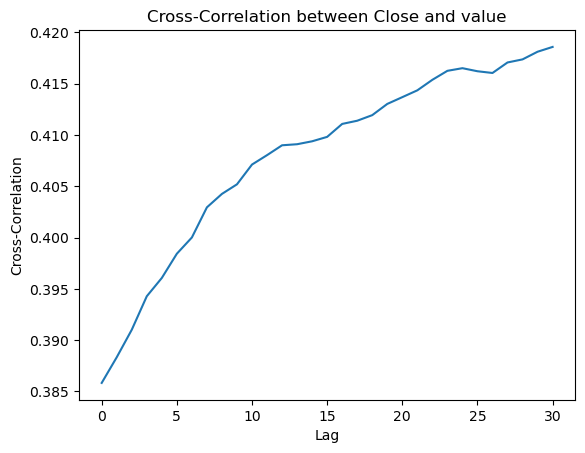

In [50]:
import numpy as np

# Function to calculate cross-correlation
def cross_correlation(series1, series2, lag_max=30):
    result = [series1.corr(series2.shift(lag)) for lag in range(lag_max+1)]
    return np.array(result)

# Calculate cross-correlation between 'Close' and 'value'
cross_corr = cross_correlation(df['Close'], df['value'], lag_max=30)

# Plot cross-correlation
plt.plot(cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Close and value')
plt.show()

In [51]:
cross_corr

array([0.38582916, 0.388331  , 0.39101222, 0.39428072, 0.39606533,
       0.3984275 , 0.40001171, 0.40294945, 0.40426081, 0.40519506,
       0.40712265, 0.40803867, 0.40900093, 0.4091043 , 0.4093905 ,
       0.40982128, 0.41108388, 0.41139541, 0.41193961, 0.41303338,
       0.41369437, 0.41435962, 0.41538548, 0.41626162, 0.41651888,
       0.41622023, 0.4160512 , 0.41707646, 0.41737731, 0.41812398,
       0.41859232])

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the combined data
df = pd.read_csv('fear_greed_btc_combined.csv', index_col='timestamp', parse_dates=True)

# Ensure that all relevant columns are numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

import pandas as pd

# Assuming your initial DataFrame is `df` and it has 'Close' and 'value' columns

# Function to create lagged features
def add_lags(df, column, lags):
    for lag in range(1, lags + 1):
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    return df

# Number of lags you want to add
num_lags = 5

# Add lagged features for 'Close' and 'value'
df = add_lags(df, 'Close', num_lags)
df = add_lags(df, 'value', num_lags)

# Drop rows with NaN values generated by lagging
df = df.dropna().reset_index(drop=True)

print(df.head())


   value value_classification        Close  Close_lag_1  Close_lag_2  \
0      8         Extreme Fear  7754.000000  6955.270020  8277.009766   
1     36                 Fear  7621.299805  7754.000000  6955.270020   
2     30                 Fear  8265.589844  7621.299805  7754.000000   
3     44                 Fear  8736.980469  8265.589844  7621.299805   
4     54              Neutral  8621.900391  8736.980469  8265.589844   

   Close_lag_3  Close_lag_4  Close_lag_5  value_lag_1  value_lag_2  \
0  9174.910156  8830.750000  9170.540039         11.0         24.0   
1  8277.009766  9174.910156  8830.750000          8.0         11.0   
2  6955.270020  8277.009766  9174.910156         36.0          8.0   
3  7754.000000  6955.270020  8277.009766         30.0         36.0   
4  7621.299805  7754.000000  6955.270020         44.0         30.0   

   value_lag_3  value_lag_4  value_lag_5  
0         40.0         15.0         30.0  
1         24.0         40.0         15.0  
2         11.0   

In [64]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded your dataset into a DataFrame called `df`
# Make sure your DataFrame has the relevant columns

# Define your features and target
features = ['value', 'value_lag_1', 'value_lag_2', 'value_lag_3', 'value_lag_4', 'value_lag_5']
target = 'Close_lag_5'

X = df[features].values
y = df[target].values

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Convert to PyTorch tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y_scaled = torch.tensor(y_scaled, dtype=torch.float32)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(len(features), 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.fc4 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model, define loss function and optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop with early stopping
epochs = 100_000
best_loss = float('inf')
patience = 10
trigger_times = 0

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_scaled)
    loss = criterion(outputs, y_scaled.view(-1, 1))
    loss.backward()
    optimizer.step()
    
    # Validation loss
    model.eval()
    with torch.no_grad():
        val_loss = mean_squared_error(y_scaled.numpy(), outputs.numpy())
        
    if val_loss < best_loss:
        best_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        
    # if trigger_times >= patience:
    #     print(f'Early stopping on epoch {epoch+1}')
    #     break
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(X_scaled).numpy()

# Inverse transform the predictions to original scale
predictions = scaler_y.inverse_transform(predictions)

# Save the predictions to a DataFrame
df['Predicted_Close'] = predictions

# Save the DataFrame to a CSV file
df.to_csv('predictions.csv', index=False)

print("Training complete and predictions saved to 'predictions.csv'")

# Save the model
torch.save(model.state_dict(), 'model.pth')
print("Model saved to model.pth")



Epoch [10/100000], Loss: 1.0372
Epoch [20/100000], Loss: 1.0209
Epoch [30/100000], Loss: 1.0067
Epoch [40/100000], Loss: 0.9938
Epoch [50/100000], Loss: 0.9820
Epoch [60/100000], Loss: 0.9708
Epoch [70/100000], Loss: 0.9601
Epoch [80/100000], Loss: 0.9493
Epoch [90/100000], Loss: 0.9387
Epoch [100/100000], Loss: 0.9282
Epoch [110/100000], Loss: 0.9176
Epoch [120/100000], Loss: 0.9070
Epoch [130/100000], Loss: 0.8968
Epoch [140/100000], Loss: 0.8868
Epoch [150/100000], Loss: 0.8773
Epoch [160/100000], Loss: 0.8681
Epoch [170/100000], Loss: 0.8596
Epoch [180/100000], Loss: 0.8518
Epoch [190/100000], Loss: 0.8447
Epoch [200/100000], Loss: 0.8385
Epoch [210/100000], Loss: 0.8330
Epoch [220/100000], Loss: 0.8282
Epoch [230/100000], Loss: 0.8242
Epoch [240/100000], Loss: 0.8208
Epoch [250/100000], Loss: 0.8179
Epoch [260/100000], Loss: 0.8153
Epoch [270/100000], Loss: 0.8129
Epoch [280/100000], Loss: 0.8107
Epoch [290/100000], Loss: 0.8088
Epoch [300/100000], Loss: 0.8070
Epoch [310/100000],

In [69]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your dataset into a DataFrame called `df`
# Make sure your DataFrame has the relevant columns

# Define your features and target
features = ['value', 'value_lag_1', 'value_lag_2', 'value_lag_3', 'value_lag_4', 'value_lag_5']
target = 'Close'

X = df[features].values
y = df[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Convert to PyTorch tensors
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_scaled = torch.tensor(y_train_scaled, dtype=torch.float32)
y_test_scaled = torch.tensor(y_test_scaled, dtype=torch.float32)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(len(features), 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.fc4 = nn.Linear(10, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model, define loss function and optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop with early stopping
epochs = 10_000
best_loss = float('inf')
patience = 500
trigger_times = 0

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_scaled)
    loss = criterion(outputs, y_train_scaled.view(-1, 1))
    loss.backward()
    optimizer.step()
    
    # Validation loss
    model.eval()
    with torch.no_grad():
        outputs_test = model(X_test_scaled)
        val_loss = criterion(outputs_test, y_test_scaled.view(-1, 1))
        
    if val_loss < best_loss:
        best_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        
    if trigger_times >= patience:
        print(f'Early stopping on epoch {epoch+1}')
        break
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Make predictions on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test_scaled).numpy()

# Inverse transform the predictions to original scale
predictions = scaler_y.inverse_transform(predictions)

# Calculate and print final test set RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Final Test Set RMSE: {rmse:.4f}')

# Save the predictions to a DataFrame
df_test = pd.DataFrame({'Actual_Close': y_test, 'Predicted_Close': predictions.flatten()})
df_test.to_csv('predictions_test.csv', index=False)

print("Training complete. Test set predictions saved to 'predictions_test.csv'")

# Save the model
torch.save(model.state_dict(), 'model.pth')
print("Model saved to model.pth")


Epoch [10/10000], Loss: 0.9903, Val Loss: 0.8703
Epoch [20/10000], Loss: 0.9762, Val Loss: 0.8584
Epoch [30/10000], Loss: 0.9662, Val Loss: 0.8494
Epoch [40/10000], Loss: 0.9567, Val Loss: 0.8405
Epoch [50/10000], Loss: 0.9470, Val Loss: 0.8316
Epoch [60/10000], Loss: 0.9373, Val Loss: 0.8226
Epoch [70/10000], Loss: 0.9285, Val Loss: 0.8143
Epoch [80/10000], Loss: 0.9200, Val Loss: 0.8062
Epoch [90/10000], Loss: 0.9116, Val Loss: 0.7981
Epoch [100/10000], Loss: 0.9035, Val Loss: 0.7902
Epoch [110/10000], Loss: 0.8956, Val Loss: 0.7826
Epoch [120/10000], Loss: 0.8880, Val Loss: 0.7755
Epoch [130/10000], Loss: 0.8805, Val Loss: 0.7685
Epoch [140/10000], Loss: 0.8728, Val Loss: 0.7616
Epoch [150/10000], Loss: 0.8650, Val Loss: 0.7550
Epoch [160/10000], Loss: 0.8573, Val Loss: 0.7485
Epoch [170/10000], Loss: 0.8495, Val Loss: 0.7421
Epoch [180/10000], Loss: 0.8417, Val Loss: 0.7359
Epoch [190/10000], Loss: 0.8341, Val Loss: 0.7298
Epoch [200/10000], Loss: 0.8263, Val Loss: 0.7236
Epoch [21